In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

VG_df=pd.read_csv('vgsales.csv')
VG_df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [205]:
#check of data type to each columns 
df.dtypes

Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
# to know if there are null values
VG_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [355]:
# delete rows that contain null values in the All feature
VG_df.isna().sum(axis=1).shape
VG_df.dropna(inplace=True)
VG_df.shape
VG_df.isna().sum(axis=0)

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [358]:
#delete Rank column 
# VG_df.drop('Rank', axis=1,inplace=True)
VG_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [192]:
print("The highest selling type of video game in global\n")
Max_Global=VG_df.groupby('Genre').Global_Sales.max().sort_values(ascending=False)
print(Max_Global)

print("\nThe highest selling type of video game in another world\n")
Max_Other=VG_df.groupby('Genre').Other_Sales.max().sort_values(ascending=False)
Max_Other

The highest selling type of video game in global

Genre
Sports                         82.74
Platform                       40.24
Racing                         35.82
Role-Playing                   31.37
Puzzle                         30.26
Misc                           29.02
Shooter                        28.31
Simulation                     24.76
Action                         21.40
Fighting                       13.04
Adventure                      11.18
Strategy                        5.45
Idea Factory                     NaN
Sony Computer Entertainment      NaN
Name: Global_Sales, dtype: float64

The highest selling type of video game in another world



Genre
Action                         10.57
Sports                          8.46
Racing                          7.53
Platform                        2.90
Misc                            2.85
Simulation                      2.75
Shooter                         2.52
Role-Playing                    1.74
Fighting                        1.41
Puzzle                          1.18
Adventure                       0.83
Strategy                        0.59
Sony Computer Entertainment     0.08
Idea Factory                    0.04
Name: Other_Sales, dtype: float64

In [399]:
# the maximum of games based on Genre & Publisher for Global & other country sales
game = VG_df.groupby(['Genre','Publisher'])[['Global_Sales','Other_Sales']].max()
game.head(1000)

Global_Sales  Other_Sales
Genre  Publisher                                              
Action 20th Century Fox Video Games          0.79         0.01
       3DO                                   1.28         0.06
       505 Games                             0.72         0.07
       5pb                                   0.06         0.00
       989 Studios                           1.73         0.06
...                                           ...          ...
Racing Gathering of Developers               0.32         0.04
       Genki                                 0.91         0.09
       Global Star                           0.22         0.03
       Gremlin Interactive Ltd               0.16         0.01
       Hasbro Interactive                    0.39         0.03

[1000 rows x 2 columns]

In [381]:
#Top maximum count of Publishers & platforms
Tpub = VG_df.Publisher.value_counts().head(20)
Tplat=VG_df.Platform.value_counts().head(20)
print(Tpub)
print(Tplat)

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                681
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Name: Publisher, dtype: int64
DS      2131
PS2     2127
PS3 

In [382]:
pd.DataFrame(Tpub)

,Publisher
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,681
Sega,632
Take-Two Interactive,412


In [383]:
pd.DataFrame(Tplat)#DS is having highest values

,Platform
DS,2131
PS2,2127
PS3,1303
Wii,1290
X360,1234
PSP,1196
PS,1189
PC,938
XB,803
GBA,786


Text(0, 0.5, 'Europe Sales \n')

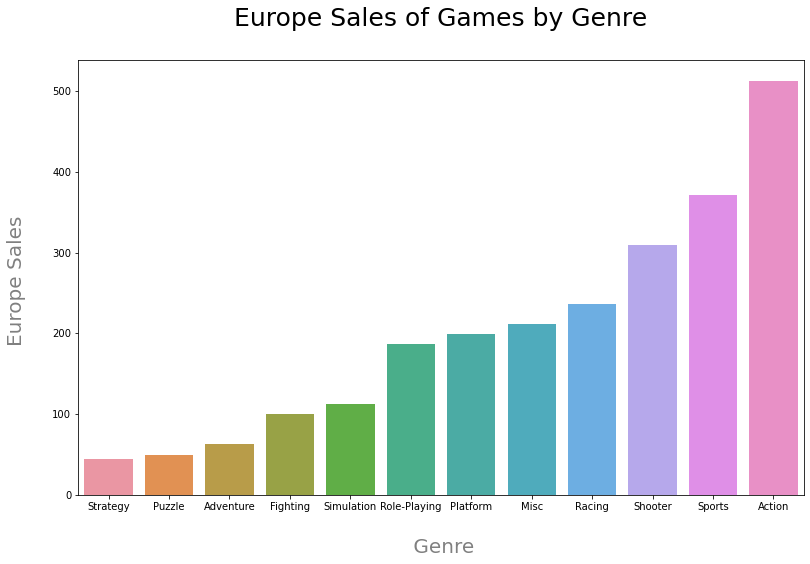

In [401]:
# Total global sales based on Genre
GS_genre = VG_df.groupby('Genre').agg({'EU_Sales':np.sum}).sort_values('EU_Sales')
plt.subplots(figsize=(13,8))
ax = sns.barplot(x=GS_genre.index, y=GS_genre.EU_Sales)
ax.set_title('Europe Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=20)
ax.set_ylabel('Europe Sales \n', color='gray', size=20)

Text(0, 0.5, 'Japan Sales \n')

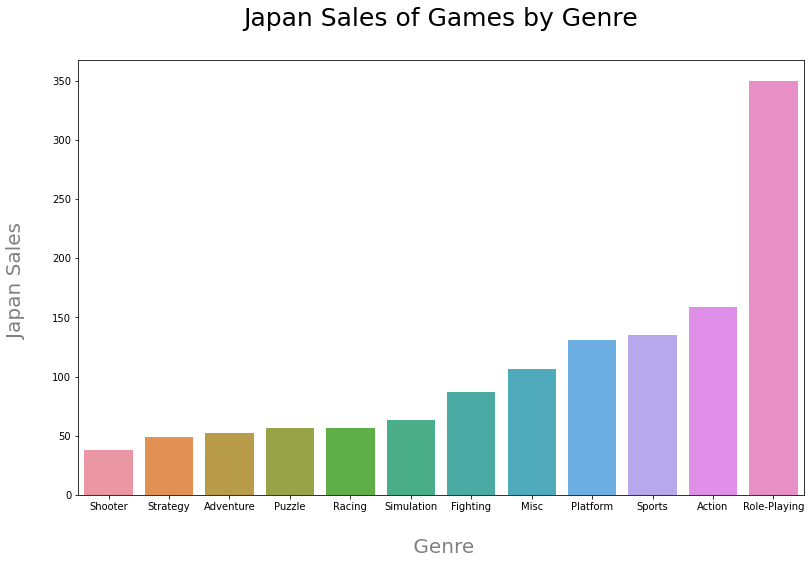

In [300]:
# Total Japan sales based on Genre
GS_genre = VG_df.groupby('Genre').agg({'JP_Sales':np.sum}).sort_values('JP_Sales')
plt.subplots(figsize=(13,8))
ax = sns.barplot(x=GS_genre.index, y=GS_genre.JP_Sales)
ax.set_title('Japan Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=20)
ax.set_ylabel('Japan Sales \n', color='gray', size=20)

In [363]:
VG_df.Year.min()

'1980'